# Análisis explorartorio de la prevalencia de enfermedades mentales por paises

## Importación de librerías y carga del DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df= pd.read_csv('data/mental-illnesses-prevalence-countries.csv')

In [32]:
print(df.columns)

Index(['Country', 'Code', 'Year', 'Schizophrenia disorders',
       'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders',
       'Eating disorders'],
      dtype='object')


## Inspección de los datos

In [2]:
# Ver las dimensiones del DataFrame
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El DataFrame tiene 6150 filas y 8 columnas


In [3]:
# Ver las primeras filas del DataFrame
df.head()

,Country,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [4]:
# Información general sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  6150 non-null   object 
 1   Code                     6150 non-null   object 
 2   Year                     6150 non-null   int64  
 3   Schizophrenia disorders  6150 non-null   float64
 4   Depressive disorders     6150 non-null   float64
 5   Anxiety disorders        6150 non-null   float64
 6   Bipolar disorders        6150 non-null   float64
 7   Eating disorders         6150 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 384.5+ KB


In [5]:
# Descripción estadística de las columnas numéricas
df.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


## Analisis por trastorno

### Trastornos esquizofrénicos

In [6]:
# Datos estadisticos
df['Schizophrenia disorders'].describe()

count    6150.000000
mean        0.266031
std         0.039258
min         0.188416
25%         0.241982
50%         0.272983
75%         0.285912
max         0.462045
Name: Schizophrenia disorders, dtype: float64

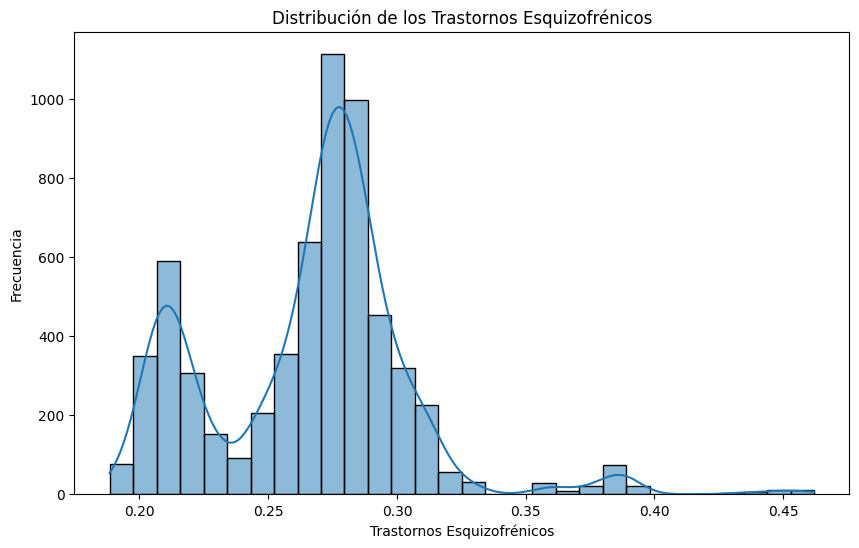

In [7]:
# Distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df['Schizophrenia disorders'], kde=True, bins=30)
plt.title(f'Distribución de los Trastornos Esquizofrénicos')
plt.xlabel('Trastornos Esquizofrénicos')
plt.ylabel('Frecuencia')
plt.show()

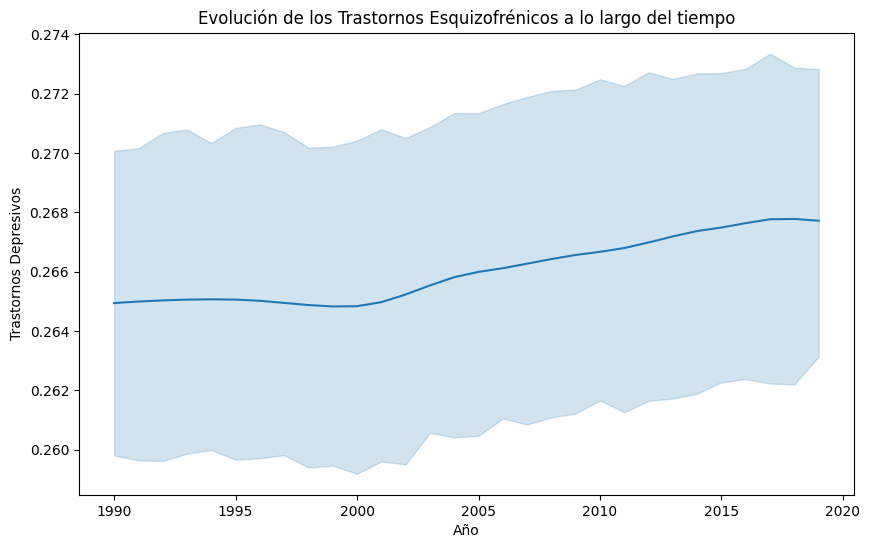

In [8]:
# Evolución temporal 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Schizophrenia disorders', data=df)
plt.title(f'Evolución de los Trastornos Esquizofrénicos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Trastornos Depresivos')
plt.show()

In [9]:
# Calculamos la media historica de los trastornos esquizofrénicos por país
schizophrenia_mean = df.groupby('Country')['Schizophrenia disorders'].mean().sort_values(ascending=False).reset_index()

#Generación del mapa de color.
fig = px.choropleth(schizophrenia_mean,
                    locations='Country',
                    locationmode='country names',
                    color='Schizophrenia disorders',
                    hover_name='Country',
                    color_continuous_scale='tempo'
                    )

# Personalización del tamaño del mapa, margenes y del título.
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=30, r=30, t=50, b=50),
    title=dict(text='<b>Medio historica de trastornos esquizofrénicos por país</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False
    )

# Personalización de la barra de color en orientación horizontal.
fig.update_layout(coloraxis_colorbar=dict(
    title="<b>Tasa de <br>esquizofrenia</b>",
    len=1,
    y=-0.15,
    orientation='h'
    ))

fig.show()

### Trastorno depresivo

In [10]:
# Datos estadisticos
df['Depressive disorders'].describe()

count    6150.000000
mean        3.766168
std         0.939617
min         1.522333
25%         3.063132
50%         3.642872
75%         4.369088
max         7.645899
Name: Depressive disorders, dtype: float64

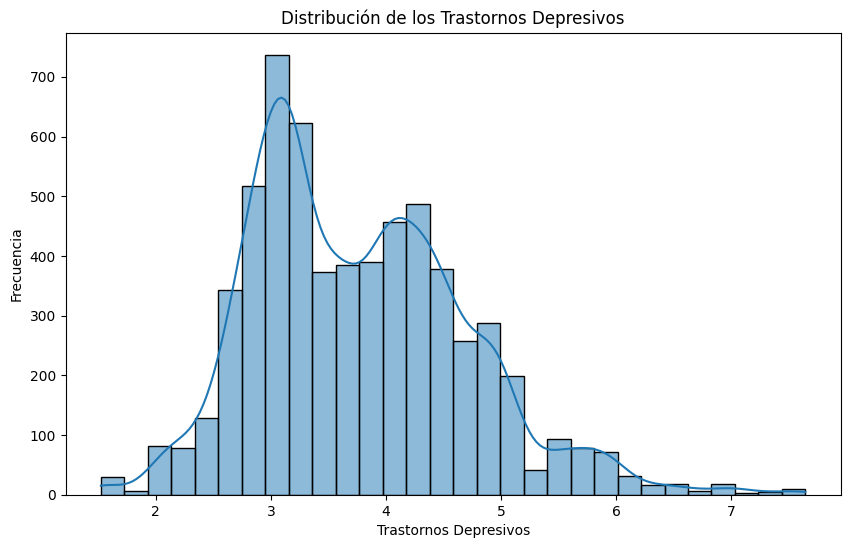

In [11]:
# Distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df['Depressive disorders'], kde=True, bins=30)
plt.title(f'Distribución de los Trastornos Depresivos')
plt.xlabel('Trastornos Depresivos')
plt.ylabel('Frecuencia')
plt.show()

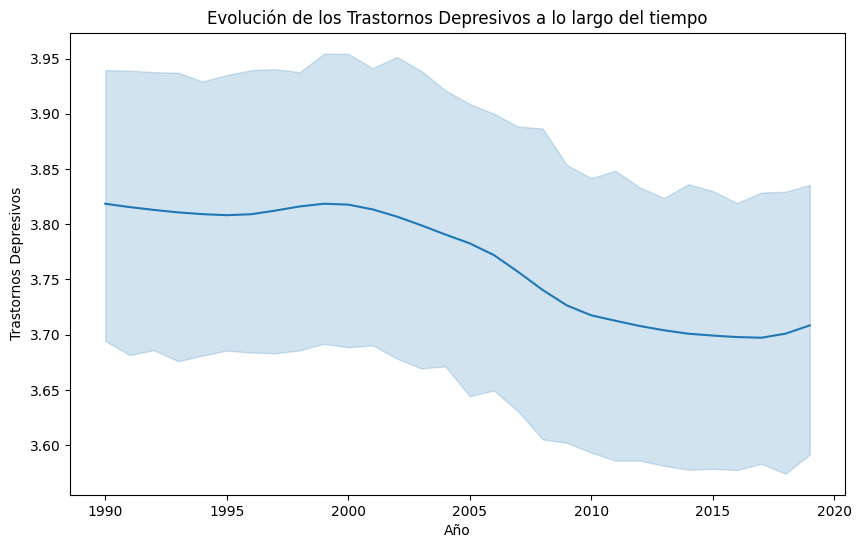

In [12]:
# Evolución temporal 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Depressive disorders', data=df)
plt.title(f'Evolución de los Trastornos Depresivos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Trastornos Depresivos')
plt.show()

In [13]:
# Calculamos la media historica de los trastornos depresivos por país
depressive_mean = df.groupby('Country')['Depressive disorders'].mean().sort_values(ascending=False).reset_index()

#Generación del mapa de color.
fig = px.choropleth(depressive_mean,
                    locations='Country',
                    locationmode='country names',
                    color='Depressive disorders',
                    hover_name='Country',
                    color_continuous_scale='tempo'
                    )

# Personalización del tamaño del mapa, margenes y del título.
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=30, r=30, t=50, b=50),
    title=dict(text='<b>Media histórica de trastornos depresivos por país</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False
    )

# Personalización de la barra de color en orientación horizontal.
fig.update_layout(coloraxis_colorbar=dict(
    title="<b>Tasa de <br>depresión</b>",
    len=1,
    y=-0.15,
    orientation='h'
    ))

fig.show()

### Trastorno de ansiedad

In [14]:
# Datos estadisticos
df['Anxiety disorders'].describe()

count    6150.000000
mean        4.098702
std         1.060642
min         1.879996
25%         3.425237
50%         3.939547
75%         4.539975
max         8.624634
Name: Anxiety disorders, dtype: float64

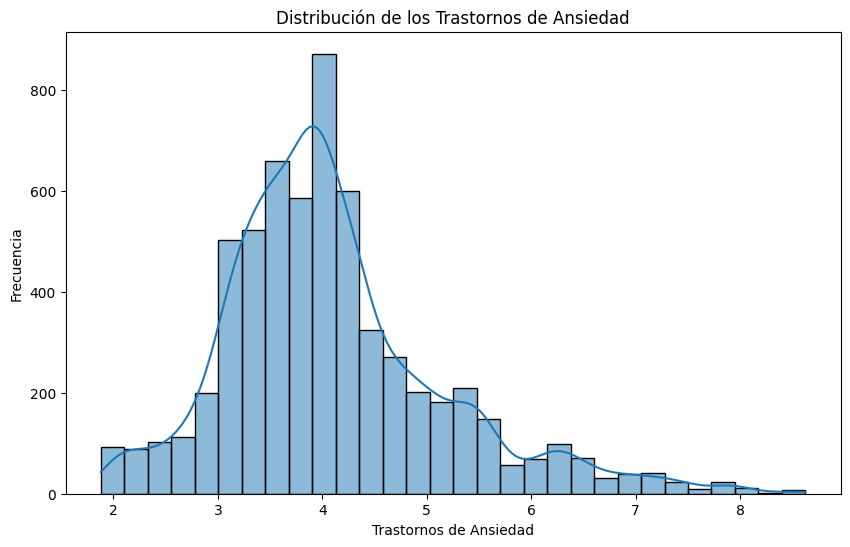

In [15]:
# Distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df['Anxiety disorders'], kde=True, bins=30)
plt.title(f'Distribución de los Trastornos de Ansiedad')
plt.xlabel('Trastornos de Ansiedad')
plt.ylabel('Frecuencia')
plt.show()

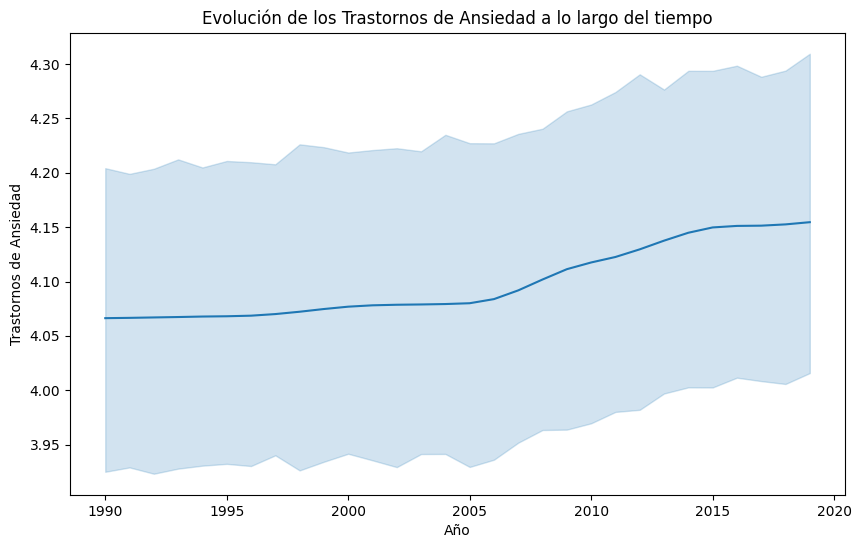

In [16]:
# Evolución temporal 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Anxiety disorders', data=df)
plt.title(f'Evolución de los Trastornos de Ansiedad a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Trastornos de Ansiedad')
plt.show()

In [17]:
# Calculamos la media historica de los trastornos depresivos por país
anxiety_mean = df.groupby('Country')['Anxiety disorders'].mean().sort_values(ascending=False).reset_index()

#Generación del mapa de color.
fig = px.choropleth(anxiety_mean,
                    locations='Country',
                    locationmode='country names',
                    color='Anxiety disorders',
                    hover_name='Country',
                    color_continuous_scale='tempo'
                    )

# Personalización del tamaño del mapa, margenes y del título.
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=30, r=30, t=50, b=50),
    title=dict(text='<b>Media histórica de trastornos de Ansiedad por país</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False
    )

# Personalización de la barra de color en orientación horizontal.
fig.update_layout(coloraxis_colorbar=dict(
    title="<b>Tasa de <br>Ansiedad</b>",
    len=1,
    y=-0.15,
    orientation='h'
    ))

fig.show()

### Trastorno de bipolar

In [18]:
# Datos estadisticos
df['Bipolar disorders'].describe()

count    6150.000000
mean        0.638366
std         0.235506
min         0.181667
25%         0.521153
50%         0.579017
75%         0.853304
max         1.506730
Name: Bipolar disorders, dtype: float64

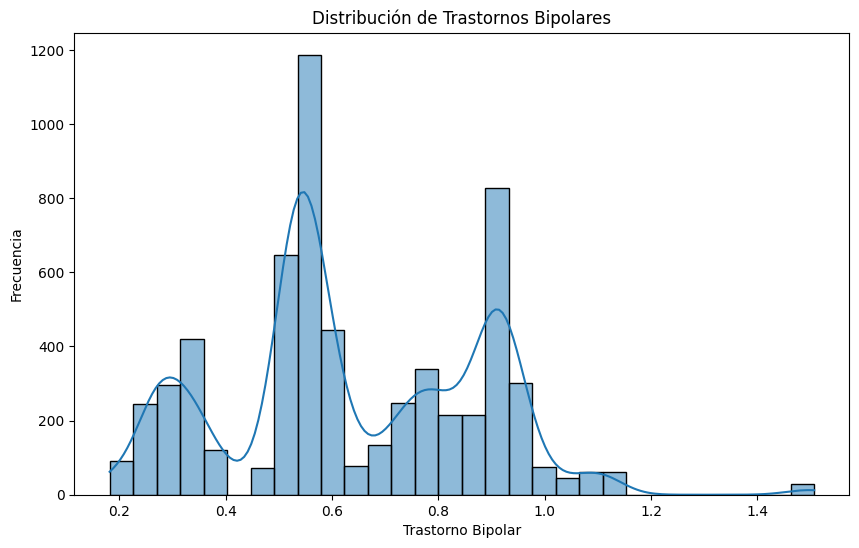

In [19]:
# Distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df['Bipolar disorders'], kde=True, bins=30)
plt.title(f'Distribución de Trastornos Bipolares')
plt.xlabel('Trastorno Bipolar')
plt.ylabel('Frecuencia')
plt.show()

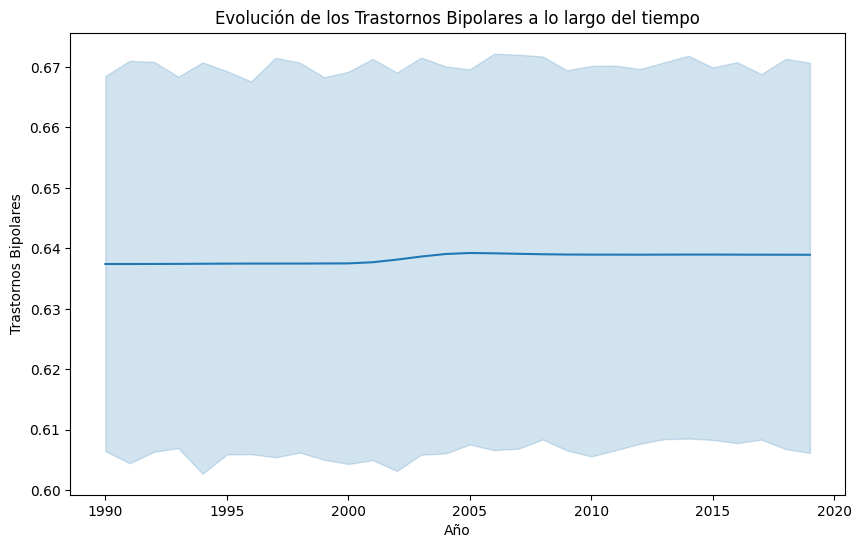

In [20]:
# Evolución temporal 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Bipolar disorders', data=df)
plt.title(f'Evolución de los Trastornos Bipolares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Trastornos Bipolares')
plt.show()

In [21]:
# Calculamos la media historica de los trastornos depresivos por país
bipolar_mean = df.groupby('Country')['Bipolar disorders'].mean().sort_values(ascending=False).reset_index()

#Generación del mapa de color.
fig = px.choropleth(bipolar_mean,
                    locations='Country',
                    locationmode='country names',
                    color='Bipolar disorders',
                    hover_name='Country',
                    color_continuous_scale='tempo'
                    )

# Personalización del tamaño del mapa, margenes y del título.
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=30, r=30, t=50, b=50),
    title=dict(text='<b>Media histórica de trastornos bipolares por país</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False
    )

# Personalización de la barra de color en orientación horizontal.
fig.update_layout(coloraxis_colorbar=dict(
    title="<b>Tasa de <br>Bipolaridad</b>",
    len=1,
    y=-0.15,
    orientation='h'
    ))

fig.show()

### Trastornos alimenticios

In [22]:
# Datos estadisticos
df['Eating disorders'].describe()

count    6150.000000
mean        0.194945
std         0.139051
min         0.044780
25%         0.095748
50%         0.144325
75%         0.242860
max         1.031688
Name: Eating disorders, dtype: float64

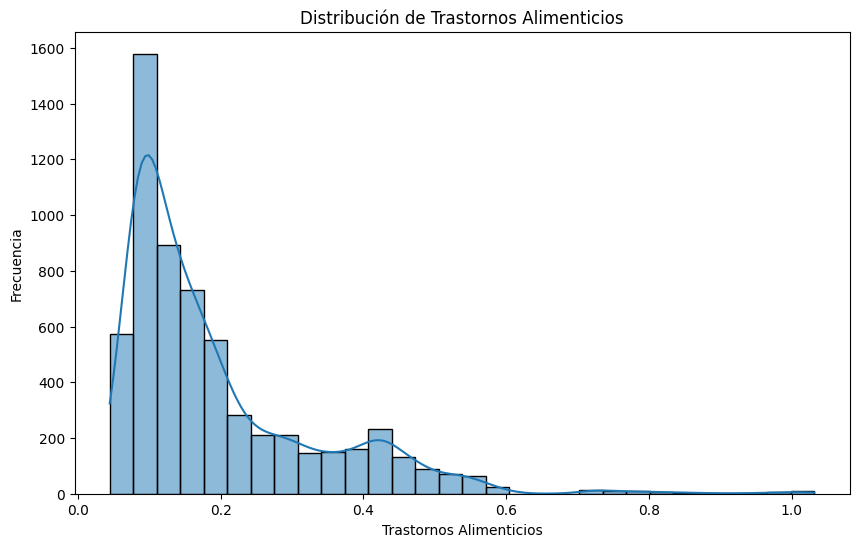

In [23]:
# Distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df['Eating disorders'], kde=True, bins=30)
plt.title(f'Distribución de Trastornos Alimenticios')
plt.xlabel('Trastornos Alimenticios')
plt.ylabel('Frecuencia')
plt.show()

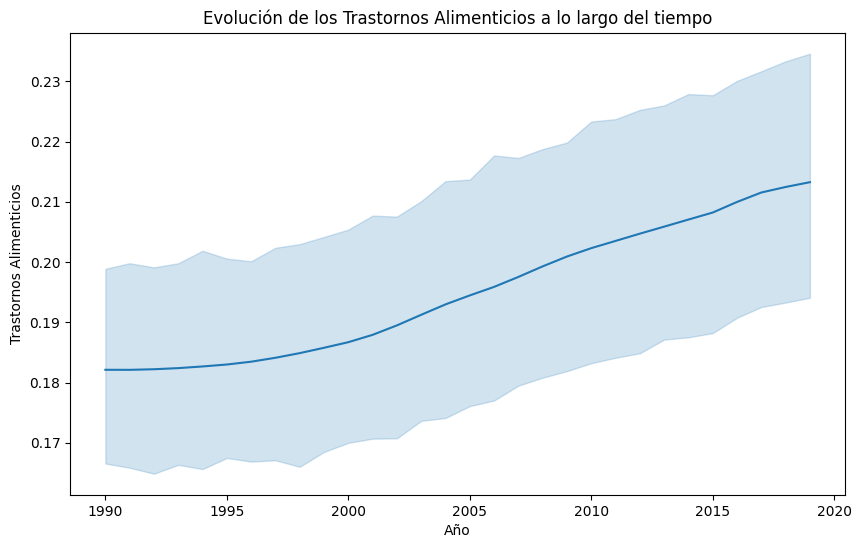

In [24]:
# Evolución temporal 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Eating disorders', data=df)
plt.title(f'Evolución de los Trastornos Alimenticios a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Trastornos Alimenticios')
plt.show()

In [25]:
# Calculamos la media historica de los trastornos depresivos por país
eating_mean = df.groupby('Country')['Eating disorders'].mean().sort_values(ascending=False).reset_index()

#Generación del mapa de color.
fig = px.choropleth(eating_mean,
                    locations='Country',
                    locationmode='country names',
                    color='Eating disorders',
                    hover_name='Country',
                    color_continuous_scale='tempo'
                    )

# Personalización del tamaño del mapa, margenes y del título.
fig.update_layout(
    width=800,
    height=500,
    margin=dict(l=30, r=30, t=50, b=50),
    title=dict(text='<b>Media histórica de trastornos alimenticios por país</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False
    )

# Personalización de la barra de color en orientación horizontal.
fig.update_layout(coloraxis_colorbar=dict(
    title="<b>Tasa de <br>trastornos alimenticios</b>",
    len=1,
    y=-0.15,
    orientation='h'
    ))

fig.show()

## Análisis Bivariado


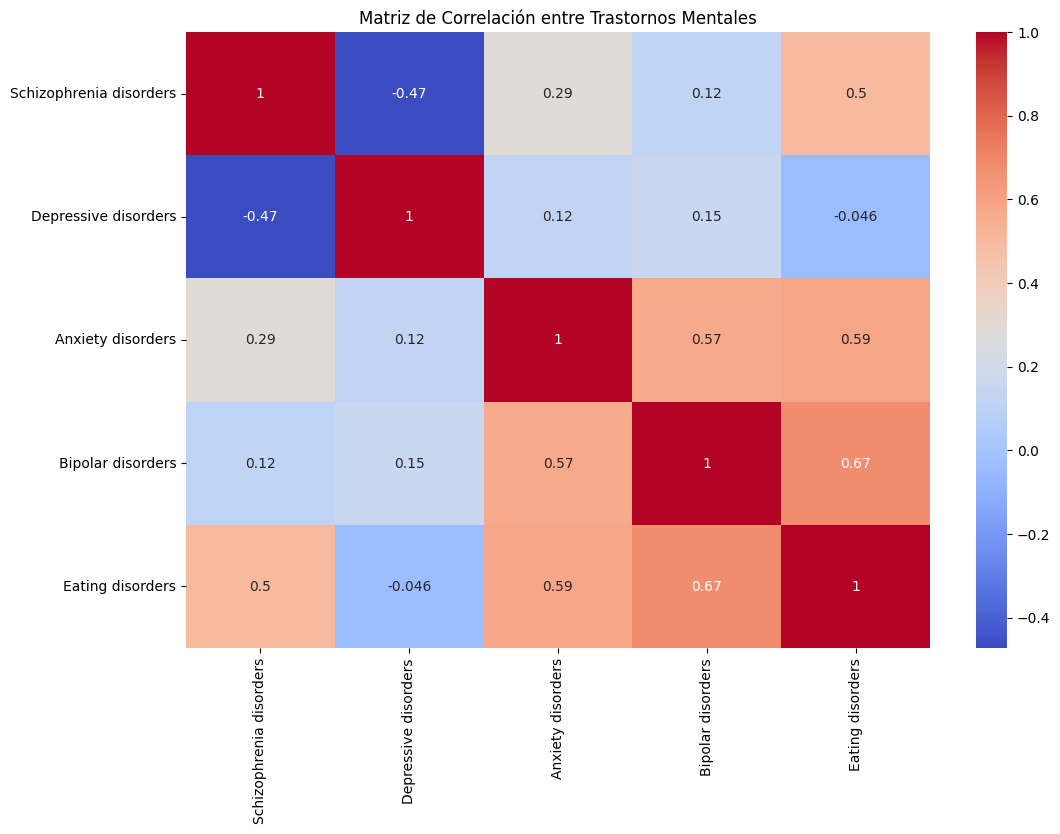

In [26]:
# Matriz de correlación
correlation_matrix = df[df.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()


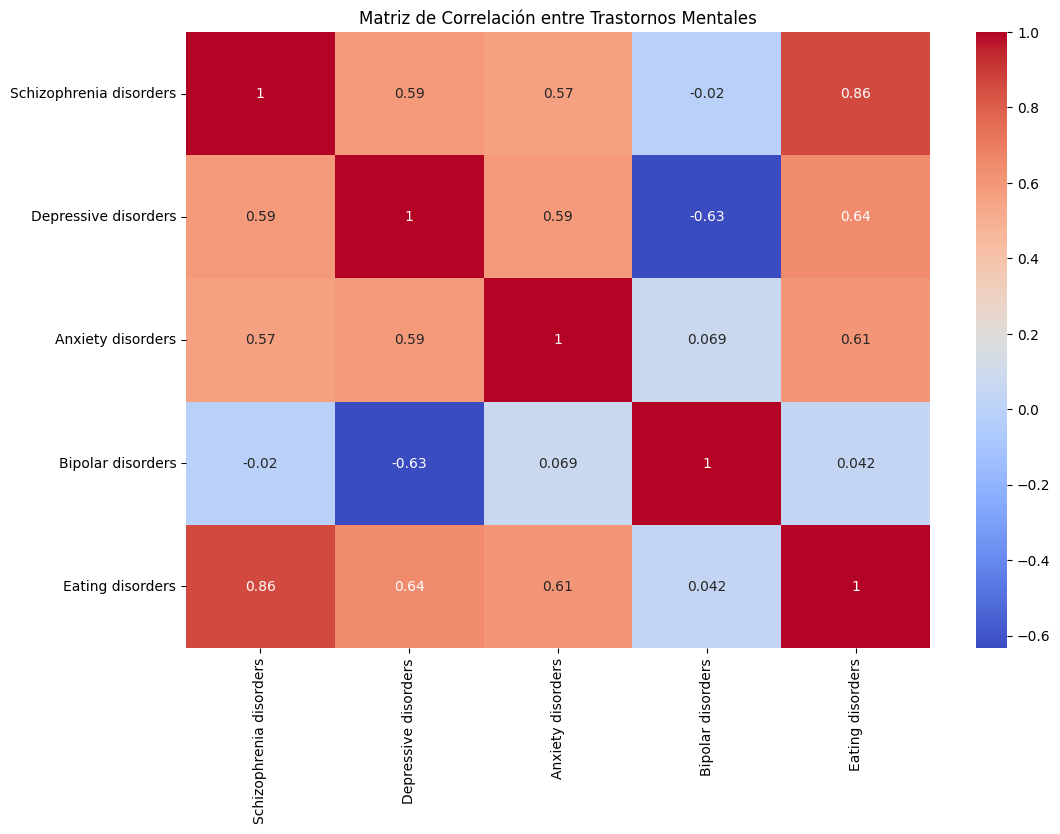

In [29]:
# Matriz de correlación
usa_data = df[df['Country'] == 'United States']
correlation_usa = usa_data[usa_data.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_usa, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

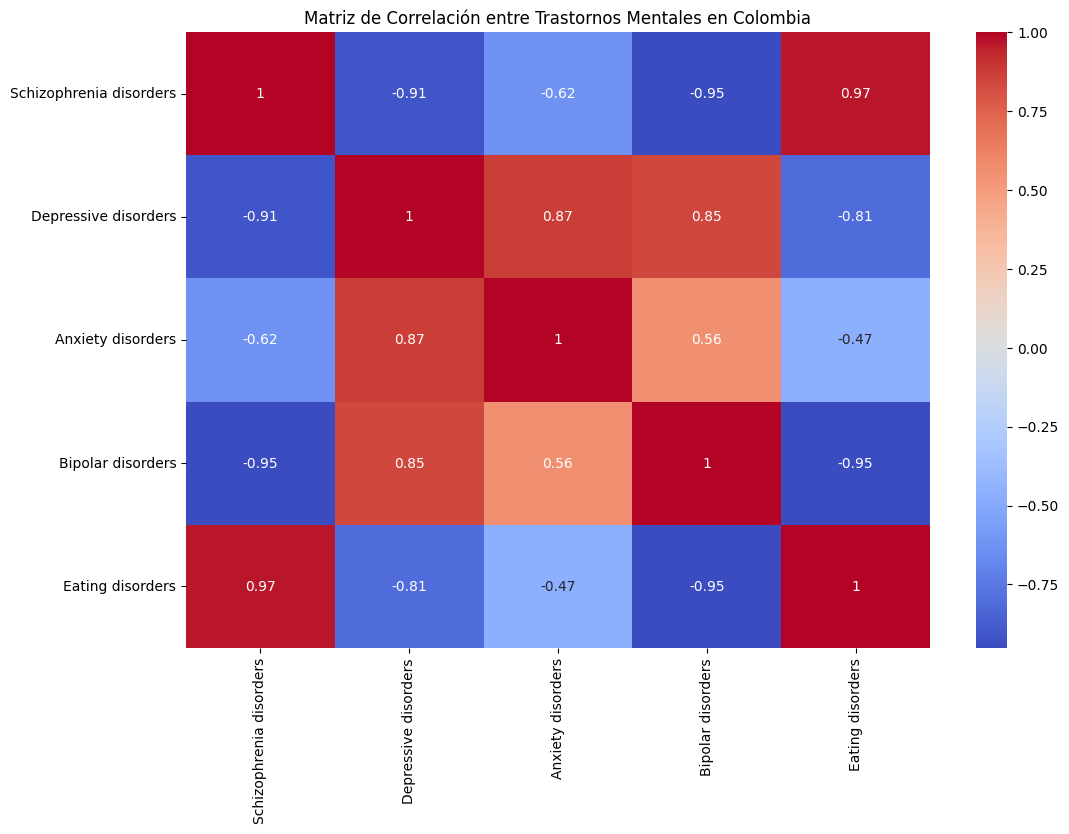

In [31]:
# Matriz de correlación
colombia_data = df[df['Country'] == 'Colombia']
correlation_colombia = colombia_data[colombia_data.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_colombia, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales en Colombia')
plt.show()

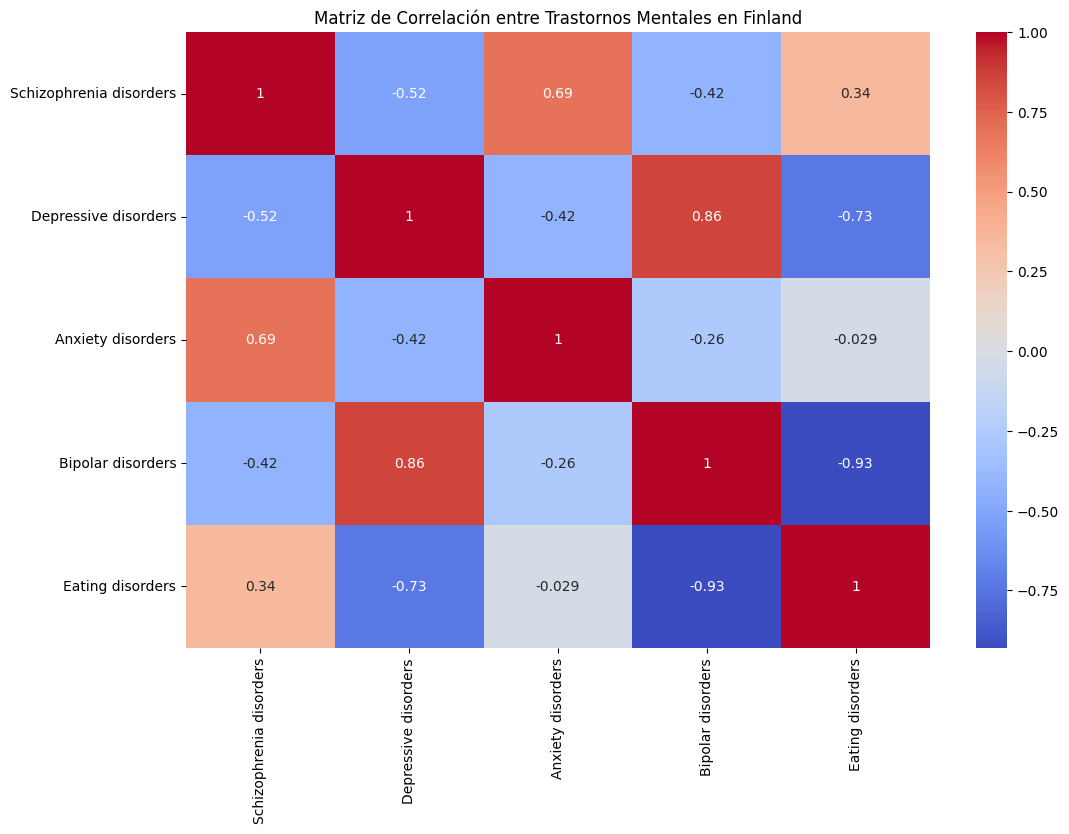

In [34]:
# Matriz de correlación
finland_data = df[df['Country'] == 'Finland']
correlation_finland = finland_data[finland_data.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_finland, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales en Finland')
plt.show()